In [54]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
style.use("fivethirtyeight")
%matplotlib inline
import seaborn as sns

import numpy as np
from livelossplot import PlotLossesKeras

print("Version of tensorflow is : ",tf.__version__)

Version of tensorflow is :  2.1.0


In [5]:
(train_data , train_label) , (test_data , test_label) = tf.keras.datasets.mnist.load_data()

train_data = train_data[: , : , : , np.newaxis]
test_data  = test_data[ : , : , : , np.newaxis]

train_label = tf.keras.utils.to_categorical(train_label)
test_label  = tf.keras.utils.to_categorical(test_label)

print("Shape of train_data" , train_data.shape)
print("Shape of test_data" , test_data.shape)

train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255.0,
                                                                 rotation_range = 10,
                                                                 height_shift_range = 0.2 ,
                                                                 width_shift_range = 0.2 ,
                                                                 zoom_range = 0.1)
test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255.0)

print("Shape of train_data" , train_data.shape)
print("Shape of train_label" , train_label.shape)
print("Shape of test_data" , test_data.shape)
print("Shape of test_label" , test_label.shape)

Shape of train_data (60000, 28, 28, 1)
Shape of test_data (10000, 28, 28, 1)
Shape of train_data (60000, 28, 28, 1)
Shape of train_label (60000, 10)
Shape of test_data (10000, 28, 28, 1)
Shape of test_label (10000, 10)


In [6]:
X_train = train_data_gen.flow(train_data , y = train_label)
X_test  = test_data_gen.flow(test_data   , y = test_label)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16 , (3 , 3),activation = "relu" , input_shape = (28 , 28 , 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32 , (3 , 3),activation = "relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64 , (3 , 3),activation = "relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256 , activation = "relu"),
    tf.keras.layers.Dense(256 , activation = "relu"),
    tf.keras.layers.Dense(10 , activation = "softmax")
])

model.compile(optimizer = "rmsprop" , loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])

#model.summary()

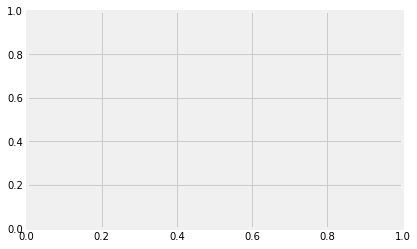

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1875 steps, validate for 312 steps
Epoch 1/50
  72/1875 [>.............................] - ETA: 1:13 - loss: 0.2565 - acc: 0.9323

In [ ]:
myCallback = CallBack
val_acc = []
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.show()
ani = animation.FuncAnimation(fig , animate ,interval = 1000)
his = model.fit(X_train ,
                steps_per_epoch = X_train.n // X_train.batch_size ,
                epochs = 50 ,
                validation_data = X_test ,
                validation_steps = X_test.n // X_test.batch_size ,
                callbacks= [myCallback()],
                verbose = 1)

In [52]:
plt.show()

In [50]:
val_acc.append(0.5)